<span style="color:red">Assignment Grade: 3.3</span>

  Q 1: 0.0

  Q 2: 0.0

  Q 3: 10.0

  Assignment grade is average of question grades. 

  Comments from pre-grade: We have found your assignment thanks. Sat. Apr 07 at 10:00:15  

  Q1 comments: Question not attempted.

  Q2 comments: Question not attempted.

  Q3 comments: File missing but code is great.


# Homework Assignment 4

#### Due: Friday April 6th, 11:59pm.

Save your file in **mp248/Assignment.4/Assignment.4.ipynb** on your Bitbucket repository.

Problems 1 and 2 respectively ask you to make plots related to the dynamics of a single pendulum and double pendulum, from *Dynamic.plots.1.ipynb* and *Dynamic.plots.2.ipynb*. 

#### Problem 1:

(a) In *Dynamic.plots.1.ipynb* the single pendulum differential equation had the two system constants, $a \geq 0$ is what we called the *friction constant*, and $b > 0$ is the *mass/gravity constant*.  The differential equation had the form $\theta'' + a \theta' + b \sin \theta = 0$.   The *total energy* of the system is

$$E_{tot} = (\theta')^2 + 2b -2b\cos\theta.$$

For a simulation of the ODE to be accurate, the total energy of the system should dissipate according to the heat loss through friction. Thus we should have equality

$$\frac{dE}{dt} = -2a(\theta')^2$$

We call the right hand side of this equation the *theoretical power loss of the system*. If $E(t_i)$ represents the actual total energy of the system at time $t_i$, then the *actual power loss (change) between frames* $t_i$ and $t_{i+1}$ would be the quantity $\frac{E(t_{i+1})-E(t_i)}{t_{i+1} - t_i} = \frac{\Delta E}{\Delta t}$. 

For the system with $a=0.1$, $b=1$, $\theta_0 = 0$ and $\theta'_0=10$, create a plot with one slider controlling the time step.  In your plot, show $\theta(t)$ as a function of time. In a dynamic text field (in your plot with the slider) present the maximum (absolute value) of the difference between the theoretical $-2a(\theta')^2$ power loss and the actual power loss $\frac{\Delta E}{\Delta t}$ between frames of the animation.  Call this quantity the power-loss-deviation (PLD) of the simulation, i.e. in your plot you should have a dynamic text field "MAX PLD: number". 

Ensure your time interval is long enough so that one can see the pendulum coming to rest (let's define this to be $E_{tot}(t_i) < 0.1$) for $t_i$ at the end of your interval.  

(b) Determine the how small $\Delta t$ needs to be to ensure the maximum PLD is less than *1.0*. 

(c) A properly simulated solution to this differential equation has a horizontal asymptote an integer multiple of $2\pi$.  How small does $\Delta t$ need to be to discover the correct asymptote, and what is the asymptote?

For parts (b) and (c) you should be using the tool you built (i.e. the dynamic plot) in part (a).

#### Problem 2: 

We roughly repeat Problem 1, but for the double pendulum.  For this problem we ask you to extend the code from *Dynamic.plots.2.ipynb*.

(a) Make a plot of $\theta_1$ and $\theta_2$ vs. $t$ for the double pendulum with initial conditions 
$$ \theta_1(0) = \pi \hskip 1cm \theta_2(0) = 0$$
$$ \theta_1'(0) = 0 \hskip 1cm \theta_2'(0) = 10$$
$$m_1 = 1 \hskip 1cm m_2 = 1$$
$$r_1 = 1 \hskip 1cm r_2 = 1$$
$$k_1 = 0.1 \hskip 1cm k_2 = 0.1$$
$$ g = 10$$

Have a slider that controls the number of steps in the numerical integration.   Have your plot run long-enough so that the asymptotic behaviour of $\theta_1$ and $\theta_2$ is apparent, in particular both trend towards integer multiples of $2 \pi$.

(b) How small does $\Delta t$ need to be to see this asymptotic behaviour reliably, and what are the integer multiples for $\theta_1$ and $\theta_2$ respectively? 


$\theta_1$ trends to $0\pi$ and $\theta_2$ trends to $2\pi$, provided $\Delta t < 40/3000$. 

#### Problem 3: 

We want to analyze and model the wave data from Lab 3 in Part I in more detail. Read the data as you did in Lab 3. The data has now changed because we are at a different date. Recall that each row contains a number of quantaties for each hour of each day over the past three weeks. Here we are interested in the distrubution of wind speeds and if and how they correlate with wave heights.

**3.1**

Read the data and make a histogram of the wind speed using $n = 10$ bins. Print a formatted statement specifying the mean of the wind speed distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# YY  MM DD hh mm WDIR WSPD GST  WVHT   DPD
f = open('46206.txt', "r")

# read data and save it into variables
YY=[]; MM=[]; DD=[]; hh=[]; mm=[]; WDIR=[]; WSPD=[]; GST=[]; WVHT=[]; DPD=[]
content = f.readlines()
first = 19
count = 0
for line in content[2:]:
    y, m, d, h, mm, wdir, wspd, gst, wvht, dpd, = line.split()[:10]
    
    # y,m,d,h,mm,wdir,wspd,gst,wvht,dpd = line.split(10)
    
    try:
        WDIR.append(float(wdir))
    except Exception as ex:
        continue
        
    YY.append(float(y)) 
    MM.append(float(m))
    DD.append(float(d))
    hh.append(float(h))
    MM.append(float(mm)) 
    WSPD.append(float(wspd))
    GST.append(float(gst))
    WVHT.append(float(wvht))
    DPD.append(float(dpd))

FileNotFoundError: [Errno 2] No such file or directory: '46206.txt'

Wind speed average 5.863


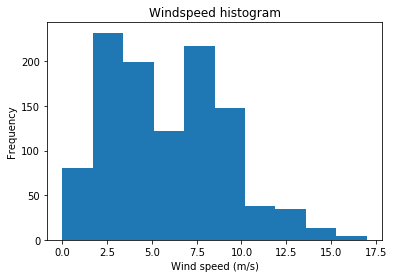

In [31]:
nbins = 10
n, bins, pacthes = plt.hist(WSPD, bins=nbins)
plt.title("Windspeed histogram")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Frequency")
print("Wind speed average %.3f" % np.average(WSPD))

**3.2**

Normalize the data so that the integral of the histogram is unity. Fit the normalized wind speed distribution with a the probability density function of a standard normal distribution. Plot the normalized data and the probability density function.

In [32]:
def pdf_normal(x, mu, var):
    normal = sqrt(2 * np.pi * var)
    expon = -(x - mu)**2 / (2 * var)
    return exp(expon) / normal

(0.0, 17.0)

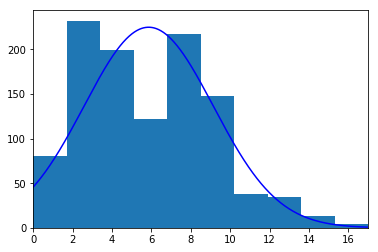

In [38]:
# I'm just going to normalize the distribution instead because I feel that data shouldn't be changed unnecessarily 
#  for curve plotting

nn = len(WSPD)
x = np.random.standard_normal(nn)

bin_width = abs(bins[0]-bins[-1])/nbins
domain = np.linspace(bins[0], bins[-1], nn)
prob_dist = pdf_normal(domain, mean(WSPD), var(WSPD))

plt.hist(WSPD, bins=nbins)

plt.plot(domain, prob_dist*nn*bin_width, 'b')

plt.xlim(min(WSPD), max(WSPD))
plt.title("Windspeed histogram")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Frequency")

**3.3**

Plot the wave height vs. wind speed. Using your own Pearson's r coefficient function determine that coefficient for the data sets wind speed and waveheight. A simple model may predict that once the wind starts increasing it may take a while for the wave height to follow. Modify your plot of wave height vs. wind speed so that it can apply an `hour_offset` so that you plot the wave height at `t + hour_offset` vs. windspeed at time `t` (remember that in the data file the latest measurements are in the top row and following rows go backward in time). 

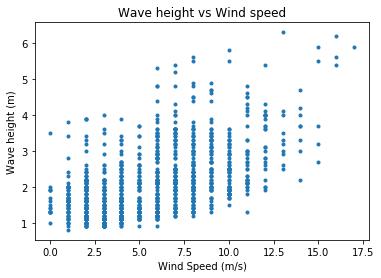

In [41]:
plot(WSPD, WVHT, '.')
plt.title("Wave height vs Wind speed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Wave height (m)")

In [46]:
def pearsr(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    return sum((x-xbar) * (y-ybar)) / (np.sqrt(sum((x-xbar)**2)) * np.sqrt(sum((y-ybar)**2)))

print("Pearsons r coefficient: ", pearsr(WSPD, WVHT))

# test against numpy
# print(numpy.corrcoef(WSPD, WVHT)[0, 1])

Pearsons r coefficient:  0.604237507568


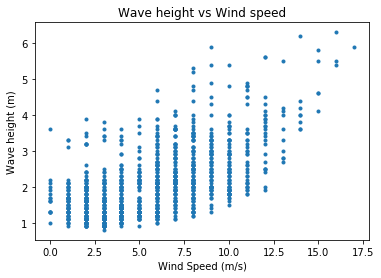

In [92]:
# since each entry refers to one hour, offset = 1 refers to a 1 hour offset

hour_offset = 4

mWVHT = [WVHT[i-hour_offset] for i in range(len(WVHT)-1, -1, -1)]
    
plot(WSPD, mWVHT[::-1], '.')
plt.title("Wave height vs Wind speed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Wave height (m)")
print("Pearsons r coefficient: ", pearsr(WSPD, mWVHT[::-1]))

**3.4**

Determine Pearson's r coefficient for `hour_offset` in the range `[0,10]`. Plot Pearson's r coefficient against `hour_offset`. Overplot a least-square fit of a $4^{th}$ order polynomial. Print a formatted sentence that states the value of the `hour_offset` for the maximum correlation between wave height vs. wind speed. (Do not read off the maximum, but use an expression that will alway print the right off set no matter what the data set is. Remember it changes every day!).

In [93]:
def pearsons_plot(hours):
    rs = []
    for x in hours:
        mWVHT = [WVHT[i-x] for i in range(len(WVHT)-1, -1, -1)]
        rs.append(pearsr(WSPD, mWVHT[::-1]))
    return rs

the value of the hour_offset for the maximum correlation between wave height vs. wind speed: 6


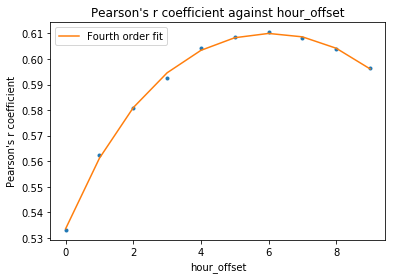

In [112]:
dom = np.arange(0, 10)
pers = pearsons_plot(dom)

plot(dom, pers, '.')
plt.title("Pearson's r coefficient against hour_offset")
plt.xlabel("hour_offset")
plt.ylabel("Pearson's r coefficient")

z = np.polyfit(dom, pers, 4)
y = lambda x: z[0] * x**4 + z[1]*x**3 + z[2]*x**2 + z[3]*x +  z[4]
plt.plot(dom, y(dom), label='Fourth order fit')
plt.legend()

max_pers = max(pers)
max_offset = 0
for r in dom:
    if pers[r] == max_pers:
        max_offset = r

print("the value of the hour_offset for the maximum correlation between wave height vs. wind speed: %d" % max_offset)